# Data Science Pipeline Tutorial: College Data

### In this tutorial, we want to run through the data science pipeline from collecting data, cleaning and parsing it, performing exploratory data analysis, hypothesis testing, and machine learning.

This tutorial is designed in python, using a custom dataset adapted from the U.S. Department of Education's College Scorecard. To download the full dataset and documentation, visit https://collegescorecard.ed.gov/data/. We will be focusing on data from the Most Recent Data by Field of Study table in order to learn information about different universities' revenue, tuition costs, racial diversity, and more through the use of the data science pipeline.

## Setup
First, we import the libraries we want to use. We will be using a pandas dataframe to represent and manipulate the data, so we import the pandas library. Matplotlib and seaborn are both useful for plotting data visually, and folium is great for mapping. Numpy and sklearn will help us plot the data and run linear regressions.

In [11]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as lin
from sklearn.metrics import mean_squared_error as mse

## Loading and Viewing Data

Next, we extract the data from online by using pandas's read_csv() function and the url we use to access the data. If your data is stored locally, read_csv() also works on the path to the file where your data is stored.

We've uploaded the data that we'll be using onto a csv file on github, so we're going to import from that url.

In [2]:
url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
df.head() # View the data

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

   ...  blackNH_ugds  title4_stud_pub  title4_stud_priv  atnd_cost_acad_yr  \
0  ...           NaN            592.0               NaN            22489.0   
1  ...           NaN           1229.0               NaN            24347.0   
2  ...           NaN              NaN               5.0            17680.0   
3  ...           NaN            585.0               NaN            23441.0   
4  ...           NaN            523.0               NaN            21476.0   

   in_st_tuition  out_st_tuition  net_tuition_rev_per_fts  \
0         9744.0         18354.0                   7413.0   
1         8568.0         19704.0                  13177.0   
2         6900.0          6900.0                  14273.0   
3        10714.0         22362.0                   8677.0   
4        11068.0         19396.0                  10160.0   

   inst_expend_per_fts  avg_fac_salary  full_time_faculty_pct  
0               5384.0          7101.0                 0.7411  
1              16454.0         10717.0                 0.7766  
2               4206.0          4292.0                 1.0000  
3               9242.0          9442.0                 0.6544  
4               8527.0          7754.0                 0.5826  

[5 rows x 67 columns]

This data is now loaded into our dataframe, df. A pandas dataframe is a 2-dimenstional structure that stores data, like a spreadsheet. With dataframes, pandas gives us many ways to interact with our data. This dataframe has each row representing a university, and each column representing one attribute of the university, such as its name, latitude and logitude, website url, and more.

However, it turns out we can't view all of the data. Let's change up some settings in pandas to view all the columns.

In [3]:
pd.options.display.max_columns = None # Removes the limit on the maximum columns you can view
df.head() # View the data again

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all  sat_vr_25pct  \
0    0.0       0.0         0.0    0.8986        0.8986         430.0   
1    0.0       0.0         0.0    0.9211        0.9211         490.0   
2    0.0       0.0         0.0       NaN           NaN           NaN   
3    0.0       0.0         0.0    0.8087        0.8087         560.0   
4    0.0       0.0         0.0    0.9774        0.9774         440.0   

   sat_vr_75pct  sat_mt_25pct  sat_mt_75pct  sat_wr_25pct  sat_wr_75pct  \
0         520.0         420.0         510.0         370.0         457.0   
1         620.0         490.0         620.0           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3         700.0         450.0         680.0           NaN           NaN   
4         520.0         420.0         510.0           NaN           NaN   

   sat_vr_mid  sat_mt_mid  sat_wr_mid  act_cm_25pct  act_cm_75pct  \
0       475.0       465.0       414.0          16.0          19.0   
1       555.0       555.0         NaN          21.0          29.0   
2         NaN         NaN         NaN           NaN           NaN   
3       630.0       565.0         NaN          25.0          31.0   
4       480.0       465.0         NaN          16.0          20.0   

   act_en_25pct  act_en_75pct  act_mt_25pct  act_mt_75pct  act_wr_25pct  \
0          14.0          20.0          15.0          18.0           NaN   
1          22.0          31.0          19.0          26.0           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3          25.0          34.0          24.0          30.0           NaN   
4          14.0          20.0          15.0          18.0           NaN   

   act_wr_75pct  act_cm_mid  act_en_mid  act_mt_mid  act_wr_mid  sat_avg  \
0           NaN        18.0        17.0        17.0         NaN    957.0   
1           NaN        25.0        27.0     

## Missing Data
In this data, you can see that some values in some columns are listed as "NaN", meaning "Not a Number". This means that there is missing data for this column from the selected university. There are many ways to deal with missing data, such as trying to fill in reasonable values or simply removing the associated row or column. In order to best determine what to do about missing data, let us first evaluate which columns have the most missing data.

In [4]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["Missing Values"]) # Creating a new dataframe by summing how many values in each column are missing
missing_count_df[(missing_count_df.T != 0).any()] # Switching around rows and columns for easier viewing
missing_count_df.sort_values(by=["Missing Values"], ascending=False).head(10) # Viewing the top 10 columns with the most missing data

Missing Values
blackNH_ugds            3431
whiteNH_ugds            3431
act_wr_75pct            3112
act_wr_mid              3112
act_wr_25pct            3112
sat_wr_75pct            2707
sat_wr_25pct            2707
sat_wr_mid              2707
act_en_25pct            2243
act_en_75pct            2243

The columns missing the most data are the columns for number of Black, non-hispanic undergraduates, the number of White non-hispanic undergraduates, as well as statistics about mean SAT and ACT section scores. 

This could be for various reasons. For example, the dataframe already has columns for Black students, White students, and Hispanic students, so likely they did not also count the overlapping Black and Hispanic or White and Hispanic students. Instead, they kept them separated. As a result, they also did not categorize the Black Non-Hispanic and White Non-Hispanic students. In this case, we do not know how to estimate how many of the Black and White students are not Hispanic, so we will opt to simply drop these columns.

The SAT and ACT sections may be missing data due to factors like test-optionality when students are applying, a lack of separating out the various scores once they are collected, or other reasons. We will opt to remove these columns too.

The last column we want to delete is 'Unnamed: 0', which is an indexing of the rows. There's no need for that since the dataframe tracks rows on its own, so we'll drop that column as well.

Dropping columns is quite simple when you know the names of the target columns.

In [5]:
drop_cols = ['blackNH_ugds','whiteNH_ugds', 'act_wr_75pct', 'act_wr_mid', 'act_wr_25pct', 'sat_wr_25pct', 'sat_wr_mid', 'sat_wr_75pct', 'act_en_25pct', 'act_en_75pct', 'act_mt_mid', 'act_en_mid', 'act_mt_75pct', 'act_mt_25pct', 'sat_vr_75pct', 'sat_vr_25pct', 'sat_vr_mid', 'sat_mt_mid', 'sat_mt_25pct', 'sat_mt_75pct', 'act_cm_75pct', 'act_cm_25pct', 'act_cm_mid', 'sat_avg', 'sat_avg_all', 'Unnamed: 0']
df = df.drop(columns=drop_cols)
display(df)

unit_id                                          inst_name         city  \
0      100654                           Alabama A & M University       Normal   
1      100663                University of Alabama at Birmingham   Birmingham   
2      100690                                 Amridge University   Montgomery   
3      100706                University of Alabama in Huntsville   Huntsville   
4      100724                           Alabama State University   Montgomery   
...       ...                                                ...          ...   
3426   491710                       Yeshiva Gedolah of Cliffwood      Keyport   
3427   491765                              Yeshivas Emek Hatorah       Howell   
3428   491817                                Seminary Bnos Chaim     Lakewood   
3429   492801  Drury University-College of Continuing Profess...  Springfield   
3430   492962  Indiana Institute of Technology-College of Pro...   Fort Wayne   

     state         zip                                        accred_inst  \
0       AL       35762  Southern Association of Colleges and Schools C...   
1       AL  35294-0110  Southern Association of Colleges and Schools C...   
2       AL  36117-3553  Southern Association of Colleges and Schools C...   
3       AL       35899  Southern Association of Colleges and Schools C...   
4       AL  36104-0271  Southern Association of Colleges and Schools C...   
...    ...         ...                                                ...   
3426    NJ  07735-5105  Association of Advanced Rabbinical and Talmudi...   
3427    NJ  07731-2444      Association of Institutions of Jewish Studies   
3428    NJ  08701-2336      Association of Institutions of Jewish Studies   
3429    MO       65802                         Higher Learning Commission   
3430    IN       46803                         Higher Learning Commission   

                                 inst_url  \
0                           www.aamu.edu/   
1                     https://www.uab.edu   
2               www.amridgeuniversity.edu   
3                             www.uah.edu   
4                           www.alasu.edu   
...                                   ...   
3426  https://yeshivagedolahcliffwood.com   
3427              yeshivasemekhatorah.com   
3428            www.seminarybnoschaim.com   
3429                  www.drury.edu/ccps/   
3430                 cps.indianatech.edu/   

                                         net_price_calc  \
0     www.aamu.edu/admissions-aid/tuition-fees/net-p...   
1      https://uab.studentaidcalculator.com/survey.aspx   
2                      www2.amridgeuniversity.edu:9091/   
3                                       finaid.uah.edu/   
4     www.alasu.edu/cost-aid/tuition-costs/net-price...   
...                                                 ...   
3426  https://yeshivagedolahcliffwood.com/wp-content...   
3427                     yeshivasemekhatorah.com/links/   
3428  seminarybnoschaim.com/wp-content/uploads/Net%2...   
3429  tcc.ruffalonl.com/Drury%20University/Freshman-...   
3430                         cps.indianatech.edu/costs/   

      height_cash_monitoring   latitude  longitude  hbcu  pbi  ANNHI  tribal  \
0                          0  34.783368 -86.568502   1.0  0.0    0.0     0.0   
1                          0  33.505697 -86.799345   0.0  0.0    0.0     0.0   
2                          0  32.362609 -86.174010   0.0  1.0    0.0     0.0   
3                          0  34.724557 -86.640449   0.0  0.0    0.0     0.0   
4                          0  32.364317 -86.295677   1.0  0.0    0.0     0.0   
...                      ...        ...        ...   ...  ...    ...     ...   
3426                       0  40.442213 -74.224235   0.0  0.0    0.0     0.0   
3427                       0  40.112501 -74.232083   0.0  0.0    0.0     0.0   
3428                       0  40.098481 -74.246731   0.0  0.0    0.0     0.0   
3429                       0  37.218523 -93.286693   0.0  

## Exploratory Data Analysis

There are about 3400 rows in our dataframe currently, which means there are a lot of Universities to look at. Here we can see them all mapped using the folium library, with a dot marker for each university.

In [6]:
m = folium.Map(location=[30, -95], zoom_start=3.5) # Create a map in Folium


for r in df.iterrows(): # Perform the following for each row in the dataframe--
    if(not pd.isna(r[1].latitude) and not pd.isna(r[1].longitude)): # If lat and long exist
        m.add_child(folium.CircleMarker(location=[r[1].latitude, r[1].longitude], fill='true', radius=3, popup='Hi', fill_color='blue', color='clear', fill_opacity=1)) # Create dot marker and add it to map

m # Display the map with the new markers

Since we want to explore the relationships between different attributes of these universities, we have to first do some additional analysis. One thing we can do is create a correlation matrix that shows whether two variables are closely related, not seemingly related, or even negatively correlated. The darker colors show a strong correlation, and the lighter colors show a weaker correlation, or even a negative correlation.

[Text(0, 0.5, 'unit_id'),
 Text(0, 1.5, 'height_cash_monitoring'),
 Text(0, 2.5, 'latitude'),
 Text(0, 3.5, 'longitude'),
 Text(0, 4.5, 'hbcu'),
 Text(0, 5.5, 'pbi'),
 Text(0, 6.5, 'ANNHI'),
 Text(0, 7.5, 'tribal'),
 Text(0, 8.5, 'AANAPII'),
 Text(0, 9.5, 'hisp_serving_inst'),
 Text(0, 10.5, 'NANTI'),
 Text(0, 11.5, 'men_only'),
 Text(0, 12.5, 'women_only'),
 Text(0, 13.5, 'adm_rate'),
 Text(0, 14.5, 'adm_rate_all'),
 Text(0, 15.5, 'UGDS'),
 Text(0, 16.5, 'white_ugds'),
 Text(0, 17.5, 'black_ugds'),
 Text(0, 18.5, 'hisp_ugds'),
 Text(0, 19.5, 'asian_ugds'),
 Text(0, 20.5, 'AIAN_ugds'),
 Text(0, 21.5, 'NHPI_ugds'),
 Text(0, 22.5, 'birac_ugds'),
 Text(0, 23.5, 'non_res_alien_ugds'),
 Text(0, 24.5, 'unkn_ugds'),
 Text(0, 25.5, 'title4_stud_pub'),
 Text(0, 26.5, 'title4_stud_priv'),
 Text(0, 27.5, 'atnd_cost_acad_yr'),
 Text(0, 28.5, 'in_st_tuition'),
 Text(0, 29.5, 'out_st_tuition'),
 Text(0, 30.5, 'net_tuition_rev_per_fts'),
 Text(0, 31.5, 'inst_expend_per_fts'),
 Text(0, 32.5, 'avg_fac_

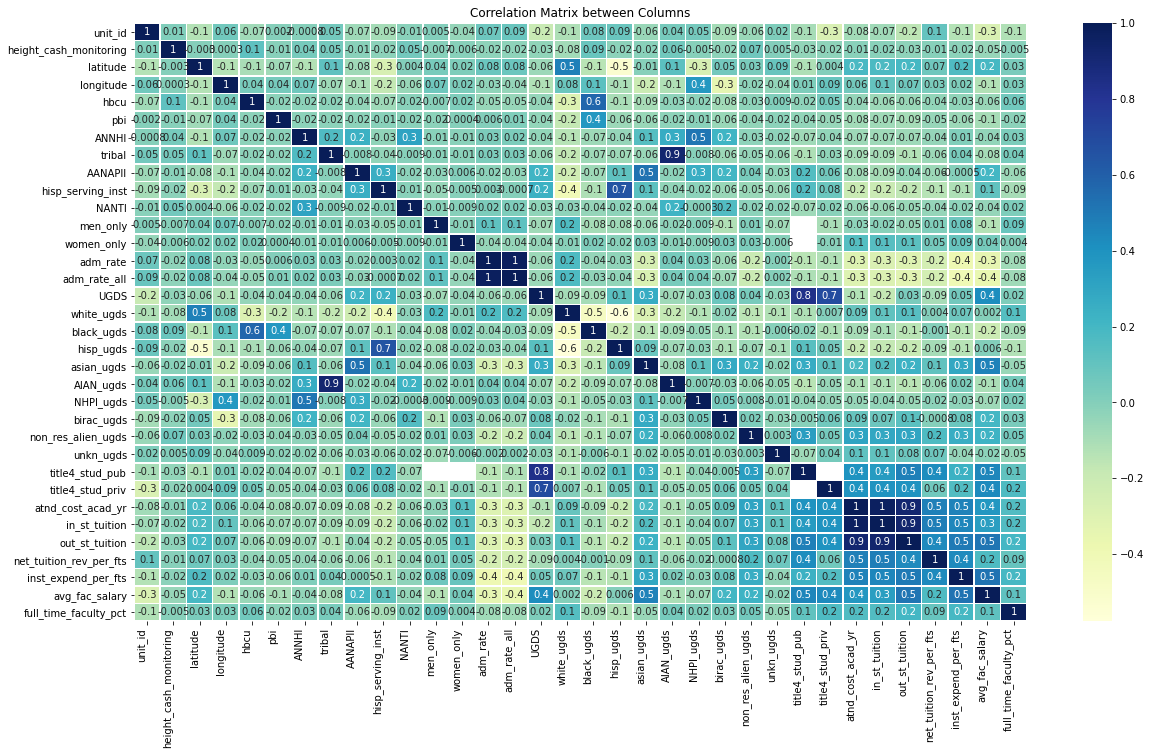

In [7]:
# Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), horizontalalignment='right')

Some obeservations we can make from this correlation matrix is that tuition rates are somewhat correlated with the revenue per student, and they are somewhat negatively correlated with admission rate.
One interesting observation that has some relevancy to current events is the correlation between admissions rate and certain racial breakdowns, as well as racial breakdowns by longitude and latitude.

In order to further explore geographical trends in racial demographics, we can plot the different percentage of students of each rate on a scatterplot by location. Grouping racial demographic by latitude and longitude is less meaningful in the US, where multiple states with a variety of socioeconomic situations exist at similar latitudes or longitudes. Instead, we can look at the demographic breakdown of universities by state and by regions in the US.

The US can be classified by 5 regions: West, Midwest, NorthEast, SouthEast, and SouthWest


In [8]:
# Create arrays for US regions
NE = ['ME', 'MA', 'RI', 'CT', 'NH', 'VT', 'NY', 'PA', 'NJ', 'DE', 'MD', 'DC']
SE = ['WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'MS', 'AR', 'LA', 'FL']
MW = ['OH', 'IN', 'MI', 'IL', 'MO', 'WI', 'MN', 'IA', 'KS', 'NE', 'SD', 'ND']
SW = ['TX', 'OK', 'NM', 'AZ']
W = ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'NV', 'CA', 'AK', 'HI']

# Filter dataframes to be region exclusive
NE_df = df.loc[df['state'].isin(NE)]
SE_df = df.loc[df['state'].isin(SE)]
MW_df = df.loc[df['state'].isin(MW)]
SW_df = df.loc[df['state'].isin(SW)]
W_df = df.loc[df['state'].isin(W)]

# Create a struct for making the graphs
tables = [[NE_df,0,0], [SE_df,0,1], [MW_df,0,2], [SW_df,1,0], [W_df,1,1]]

<ipython-input-9-d76a9f44d0f0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


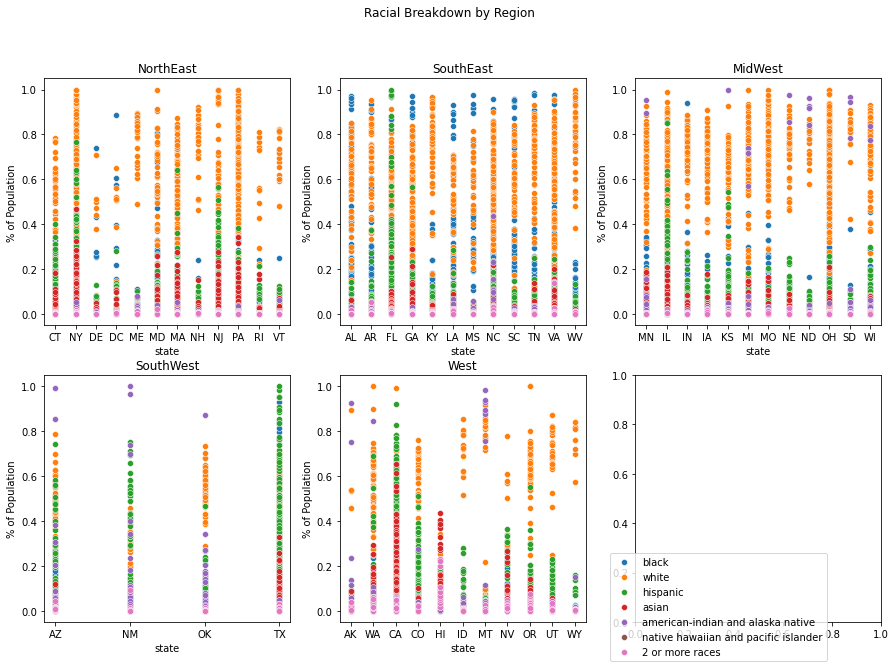

In [9]:
# Create a matplotlib figure, assign title and labels


fig,ax = plt.subplots(2,3) # Create a 2x3 grid to place down graphs
fig.set_figheight(10) # Set height and width
fig.set_figwidth(15)
fig.suptitle('Racial Breakdown by Region') # Title of overall figure
ax[0, 0].set(title='NorthEast', ylabel='% of Population') # Label top left graph and axes
ax[0, 1].set(title='SouthEast', ylabel='% of Population') # Top middle graph
ax[0, 2].set(title='MidWest', ylabel='% of Population') # Top right graph
ax[1, 0].set(title='SouthWest', ylabel='% of Population') # Bottom left graph
ax[1, 1].set(title='West', ylabel='% of Population') # Bottom mid graph

for [a,b,c] in tables: # x axis is state, y axis is % of population, ax determines which graph
    sns.scatterplot(x=a.state, y=a.black_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.white_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.hisp_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.asian_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.AIAN_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.NHPI_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.NHPI_ugds, ax=ax[b][c])
ax[1, 1].legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'], bbox_to_anchor=(2, .3)) # Create legend for bottom mid graph, anchor it in bottom right graph
ax[1, 2].set_zorder(-1) # Move bottom right graph behind legend
fig.show()

Here we can see that the population breakdown varies by region of the United States. We are hypothesizing in this toturial that the admission rates are also different for different races in the United States.

## Hypothesis Testing

Let's take a look at race vs. acceptance rate. Hypothesis testing is an important step in analyzing data, as it gives a quanitative method to guage whether two elements are actually related. For this step, we used a machine learning technique of attempting to fit a linear regression to the data. A linear regression is an algorithm used when the range of values is continuous, as cost of admissions is. This method attempts to predict the value of one variable using the value of another by fitting a straight line.

For each race, we will fit a linear regression to the population per university as the cost of attendance increases

R squared:		 0.007290134862703246
Coefficient:		 -0.01965678931721349
Y intercept:		 2720.2549338340173
Mean squared error:	 13541223.879117632


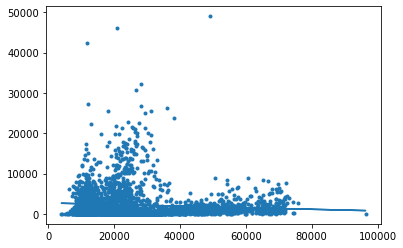

In [13]:
# WHITE
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['white_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
white_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(white_df['cost']).reshape(-1,1)
y = np.array(white_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(white_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(white_df['cost'], white_df['pop'], marker='.')
plt.plot(white_df['cost'], y_pred)
plt.show()

R squared:		 0.02601173667705381
Coefficient:		 -0.012023279959584274
Y intercept:		 884.7414511290336
Mean squared error:	 1393080.687335278


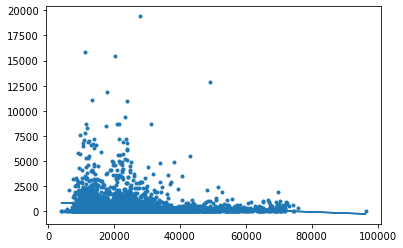

In [14]:
# BLACK
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['black_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
black_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(black_df['cost']).reshape(-1,1)
y = np.array(black_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(black_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(black_df['cost'], black_df['pop'], marker='.')
plt.plot(black_df['cost'], y_pred)
plt.show()

R squared:		 0.0006888538858953464
Coefficient:		 -0.001442229710223871
Y intercept:		 328.5541345404156
Mean squared error:	 776584.0598884593


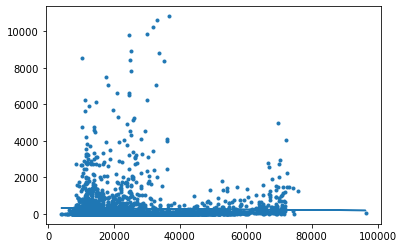

In [15]:
# ASIAN
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['asian_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(asian_df['cost']).reshape(-1,1)
y = np.array(asian_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(asian_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(asian_df['cost'], asian_df['pop'], marker='.')
plt.plot(asian_df['cost'], y_pred)
plt.show()

R squared:		 0.03568921002318415
Coefficient:		 -0.027449489965075746
Y intercept:		 1662.6010131603275
Mean squared error:	 5239557.69937117


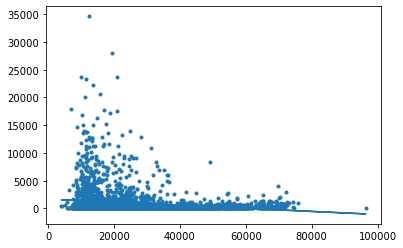

In [16]:
# HISPANIC
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['hisp_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(asian_df['cost']).reshape(-1,1)
y = np.array(asian_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(asian_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(asian_df['cost'], asian_df['pop'], marker='.')
plt.plot(asian_df['cost'], y_pred)
plt.show()

R squared:		 0.02617581181433315
Coefficient:		 -0.0009391443228410016
Y intercept:		 55.23766830859367
Mean squared error:	 8444.83270085704


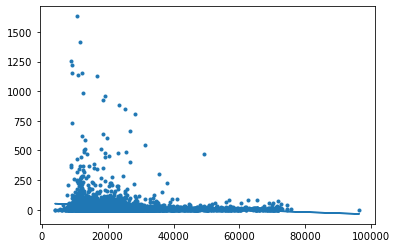

In [18]:
# American Indian and Alaskan Natives
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['AIAN_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(asian_df['cost']).reshape(-1,1)
y = np.array(asian_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(asian_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(asian_df['cost'], asian_df['pop'], marker='.')
plt.plot(asian_df['cost'], y_pred)
plt.show()

R squared:		 0.009472758564408656
Coefficient:		 -0.00037242484019610014
Y intercept:		 23.58793007521713
Mean squared error:	 3732.615138997227


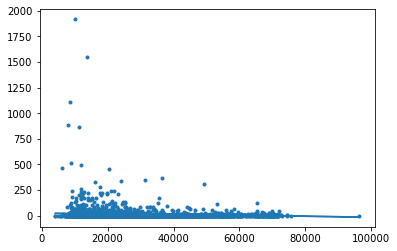

In [19]:
# Native Hawaiian and Pacific Islanders
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['NHPI_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(asian_df['cost']).reshape(-1,1)
y = np.array(asian_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(asian_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(asian_df['cost'], asian_df['pop'], marker='.')
plt.plot(asian_df['cost'], y_pred)
plt.show()

For linear regression, hispanic individuals had the steepest coefficient of -.027, while Black individuals had 2nd at -.019, and the rest at values closer and closer to zero. Looking at the graphs, we can see that White and Black are both pretty strongly centered around the linear regression line, but black deviates from the line more than white does further left at the lower cost. This is what leads it to have a smaller coefficient in its linear regression line. Asian on the other hand has less of a deviation on the left hand side, and is balanced out by a deviation on the right side of the graph as well. The data here is pretty well spread out, leading to a coefficient of just about 0. Hispanic and AIAN individuals deviated from the linear regression line in the lower values, and Native Hawaiian and Pacific Islanders stayed close to the slope of the regression line, close to 0.

## Conclusion:

From these linear regressions, we can see that the correlations between race and acceptance rate may have been overstated in the correlation matrix earlier. As acceptance rate increases, the coefficient of the linear regression was very small for most races, and even 0 for some. This does not suggest a strong correlaiton between these variables. In the future, it may be worth exploring the relationship between the racial breakdown of US regions and these acceptance rates, since limiting to an area may yield more specific results.